# 2 第二章：数据可视化

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [1]:
%matplotlib inline

In [2]:
df = pd.read_csv('result.csv')
df.head(3)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S


##### 任务二：可视化展示泰坦尼克号数据集中男女中生存人数分布情况（用柱状图试试）

In [6]:
survived_sex = df.groupby('Sex').Survived.sum()
survived_sex

Sex
female    233
male      109
Name: Survived, dtype: int64

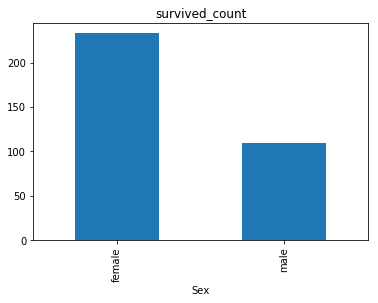

In [7]:
survived_sex.plot.bar()
plt.title('survived_count')
plt.show()

In [10]:
df.groupby(['Sex','Survived']).Survived.count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [11]:
df.groupby(['Sex','Survived']).Survived.count().unstack()

Survived,0,1
Sex,,
female,81,233
male,468,109


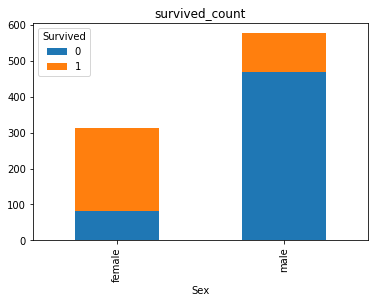

In [13]:
df.groupby(['Sex','Survived']).Survived.count().unstack().plot(kind='bar',stacked=True)
plt.title('survived_count')   # 设置 stacked = True 即生成堆砌柱状图  
plt.show()

##### 任务三：可视化展示泰坦尼克号数据集中男女中生存人与死亡人数的比例图（用柱状图试试）

In [15]:
fare_survived = df.groupby('Fare').Survived.value_counts()
fare_survived

Fare      Survived
0.0000    0           14
          1            1
4.0125    0            1
5.0000    0            1
6.2375    0            1
                      ..
247.5208  1            1
262.3750  1            2
263.0000  0            2
          1            2
512.3292  1            3
Name: Survived, Length: 330, dtype: int64

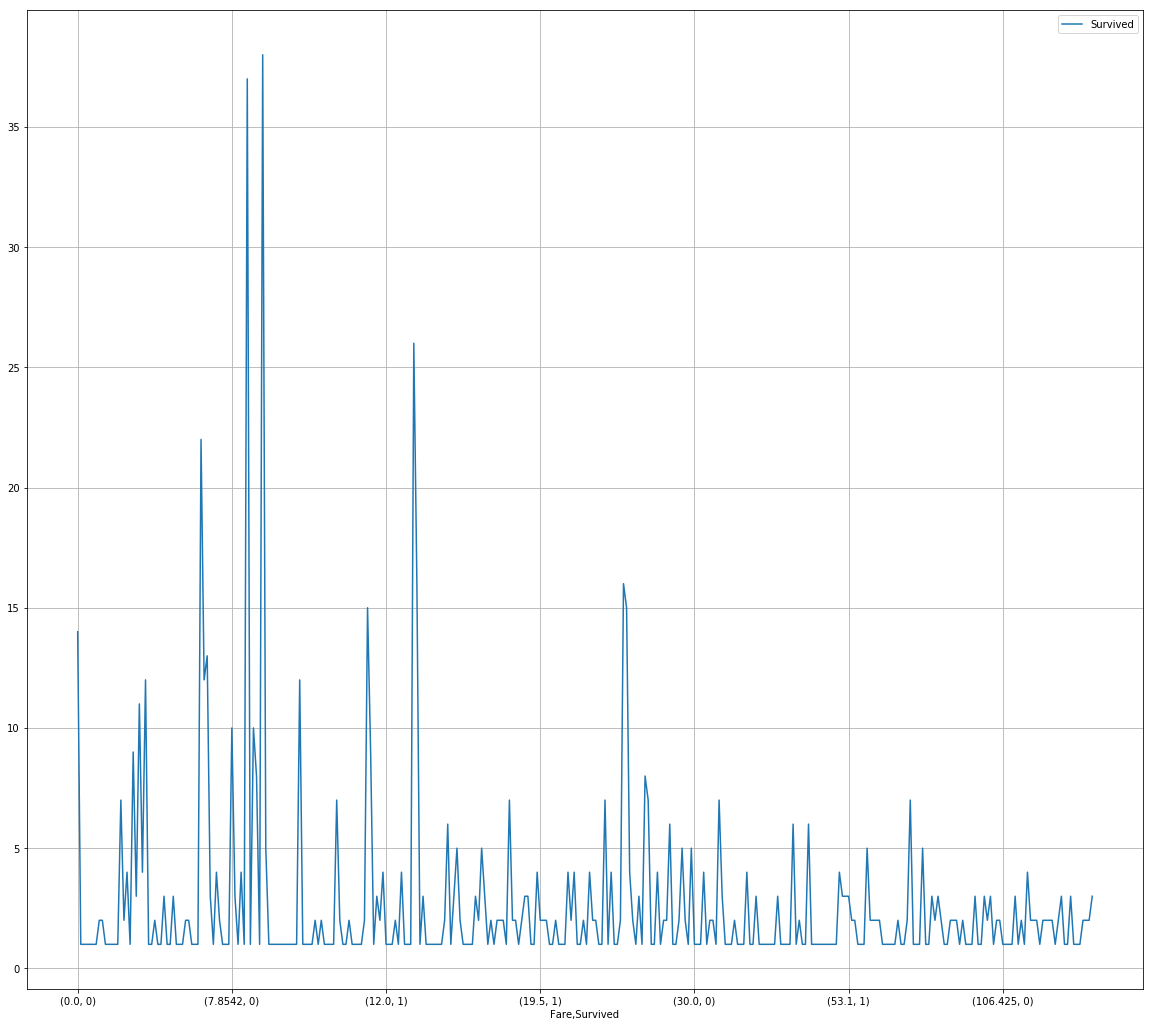

In [16]:
fig = plt.figure(figsize=(20,18))
fare_survived.plot(grid=True)
plt.legend(loc = 'best')   #显示图例 
plt.show()

In [11]:
fare_survived_1 = df.groupby('Fare').Survived.value_counts().sort_values(ascending = False)
fare_survived_1

Fare     Survived
8.0500   0           38
7.8958   0           37
13.0000  0           26
7.7500   0           22
26.0000  0           16
                     ..
20.2500  1            1
         0            1
18.7875  1            1
         0            1
15.0500  0            1
Name: Survived, Length: 330, dtype: int64

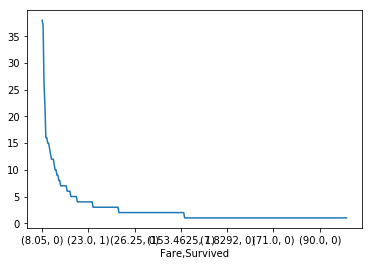

In [12]:
fig = plt.figure()
fare_survived_1.plot()
plt.show()

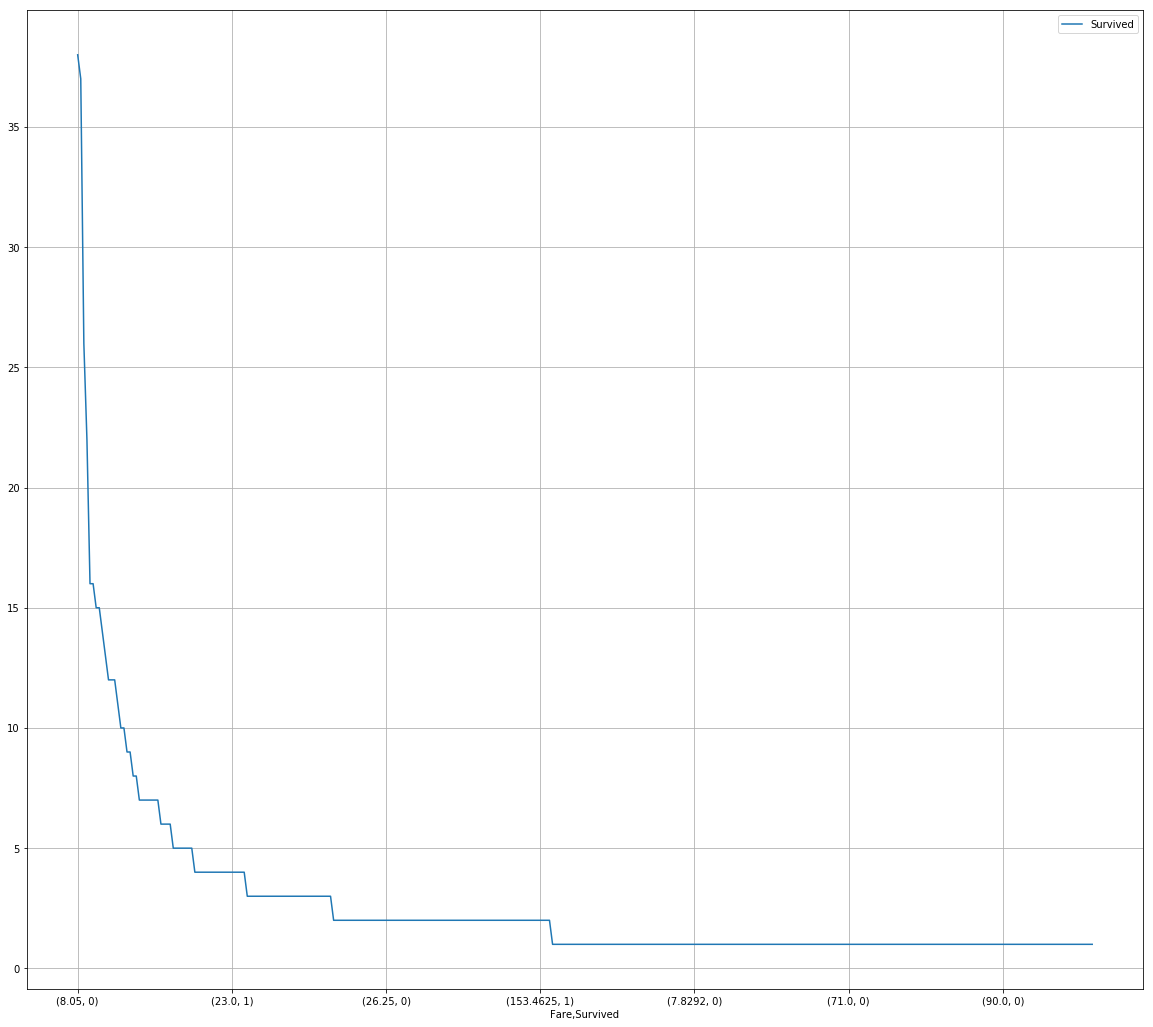

In [13]:
fig = plt.figure(figsize=(20,18))
fare_survived_1.plot(grid=True)
plt.legend(loc = 'best')   #显示图例 
plt.show()

In [18]:
pclass_survived = df.groupby('Pclass').Survived.value_counts()
pclass_survived

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [19]:
pclass_survived.unstack()

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


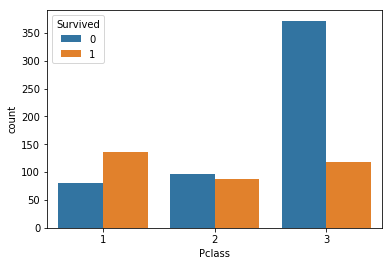

In [21]:
import seaborn as sns
sns.countplot(x="Pclass", hue="Survived", data=df)

##### 任务六：可视化展示泰坦尼克号数据集中不同年龄的人生存与死亡人数分布情况

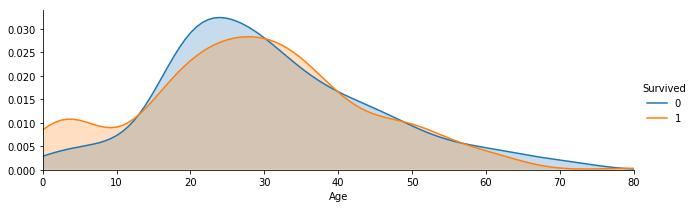

In [22]:
facet = sns.FacetGrid(df, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()

##### 任务七：可视化展示泰坦尼克号数据集中不同仓位等级的人年龄分布情况

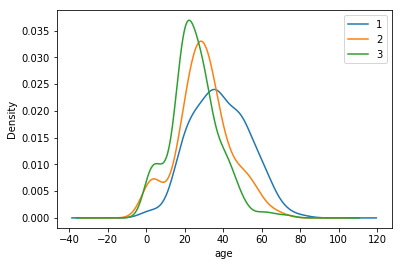

In [24]:
df.Age[df.Pclass == 1].plot(kind='kde')
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
plt.xlabel("age")
plt.legend((1,2,3),loc="best")